In [1]:
import pickle

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [ ]:
BASE_PATH = "../../"

TRAINING_DATA_PATH = f"{BASE_PATH}/data/dfd_training"

SVM_PATH = f"{BASE_PATH}/models/dfd-motives_svc.pkl"
VECTORIZER_PATH = f"{BASE_PATH}/models/dfd-motives_vectorizer.pkl"

# Load Data

In [3]:
train_df = pd.read_csv(f"{TRAINING_DATA_PATH}/dfd-motives5s_train8k.tsv", sep="\t", index_col=0)
train_df["label"].value_counts()

label
Rufname       3383
Beruf         2044
Übername       943
Herkunft       847
Wohnstätte     783
Name: count, dtype: int64

# Initialize and Train the SVM Classifier

In [4]:
# took 13.7s

# Init components
#model = SVC(kernel="linear")
#vectorizer = TfidfVectorizer(max_df=0.7, analyzer="char", ngram_range=(1,3))

# Train the Classifier
#svm = SVC(kernel="linear").fit(vectorizer.fit_transform(train_df["text"]), train_df["label"])

# Store components
#with open(SVM_PATH, "wb") as f:
#    pickle.dump(svm, f)

#with open(VECTORIZER_PATH, "wb") as f:
#    pickle.dump(vectorizer, f)

# Reload and Evaluate Classifier

In [5]:
with open(SVM_PATH, "rb") as f:
    svm = pickle.load(f)

with open(VECTORIZER_PATH, "rb") as f:
    vectorizer = pickle.load(f)

In [6]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

test_df = pd.read_csv(f"{TRAINING_DATA_PATH}/dfd-motives5s_test.tsv", sep="\t", index_col=0)
y_true = test_df["label"]

# predict
y_svm = svm.predict(vectorizer.transform(test_df["text"])) # took 3.0s

{
    "f1_macro": f1_score(y_true, y_svm, average="macro"),
    "f1_weighted": f1_score(y_true, y_svm, average="weighted"),
    "accuracy": accuracy_score(y_true, y_svm)
}

{'f1_macro': 0.6474283452109408,
 'f1_weighted': 0.7127572022015412,
 'accuracy': 0.7287630402384501}

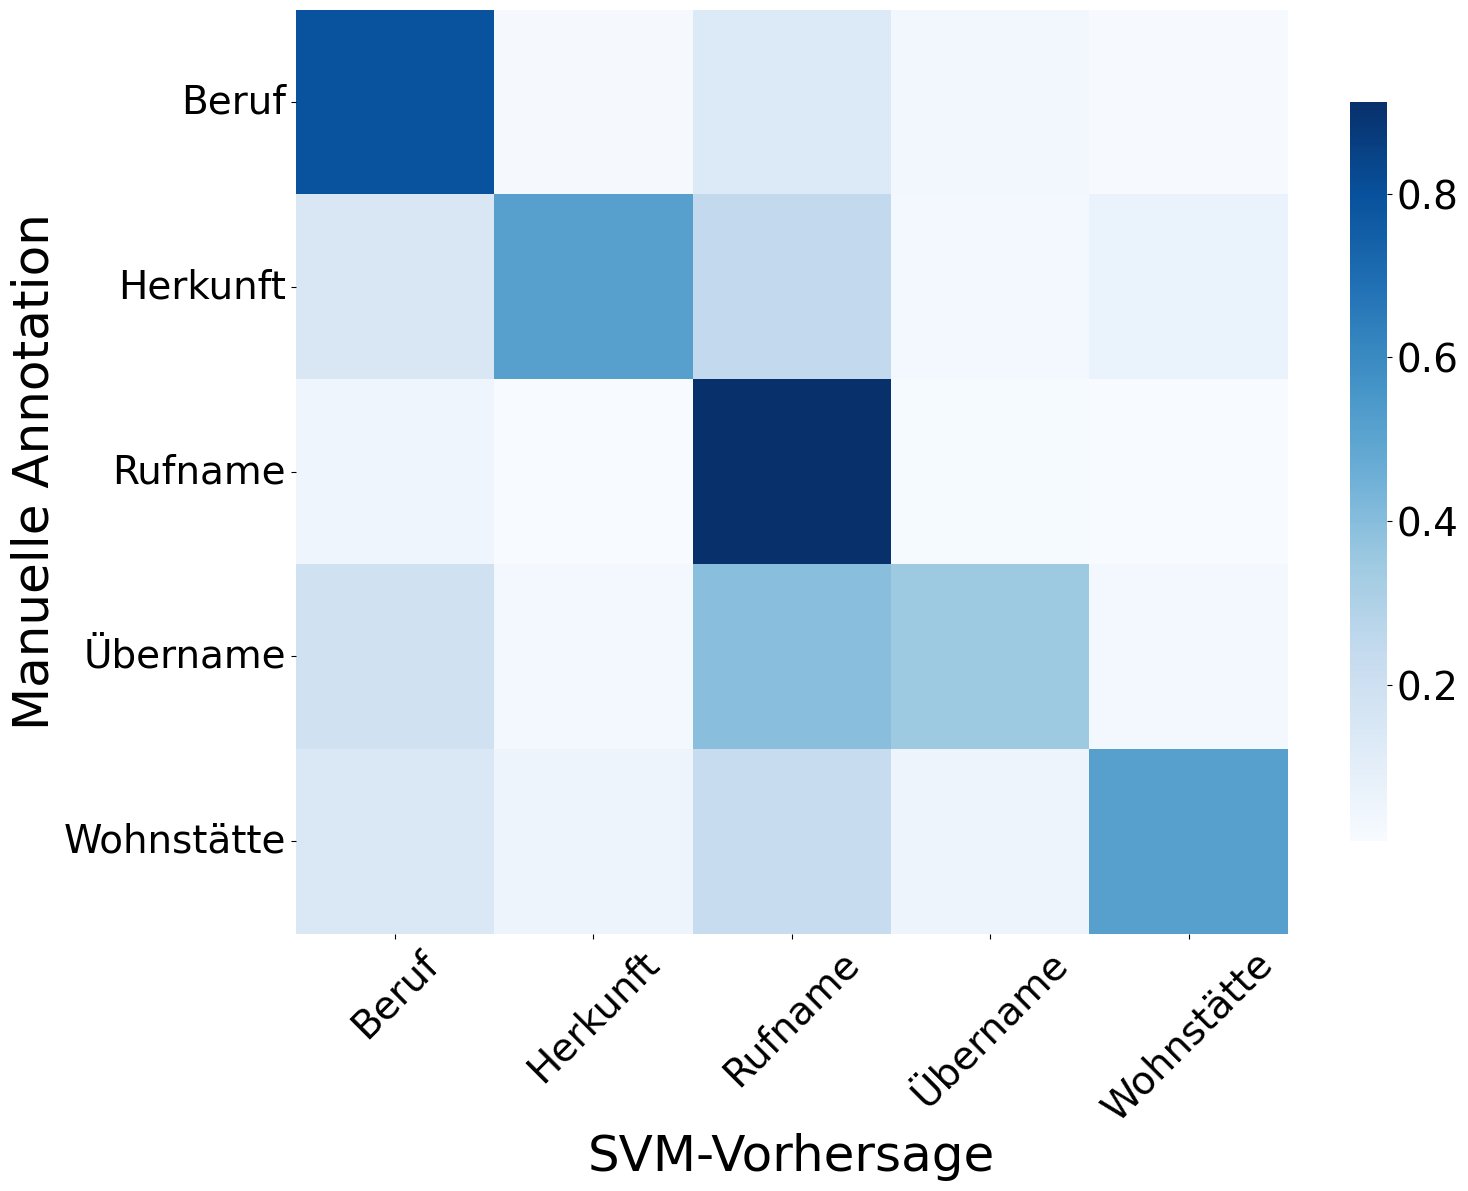

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from utils import plot_utils

fig, ax = plt.subplots(figsize=plot_utils.FIGSIZE)

sorted_labels = ["Beruf", "Herkunft", "Rufname", "Übername", "Wohnstätte"]
matrix = confusion_matrix(y_true, y_svm, labels=sorted_labels,normalize="true")

ax = sns.heatmap(matrix, cmap=plt.cm.Blues, cbar_kws={"shrink": .8})

ax.set_xlabel("SVM-Vorhersage", fontdict={"size": plot_utils.LABEL_SIZE})
ax.set_xticklabels(sorted_labels, rotation=45, fontdict={"size": plot_utils.TICK_SIZE})
ax.set_ylabel("Manuelle Annotation", fontdict={"size": plot_utils.LABEL_SIZE})
ax.set_yticklabels(sorted_labels, rotation=0, fontdict={"size": plot_utils.TICK_SIZE})

ax.collections[0].colorbar.ax.tick_params(labelsize=plot_utils.TICK_SIZE)

plt.show()

In [8]:
matrix = confusion_matrix(y_true, y_svm, labels=sorted_labels, normalize="true")
pd.DataFrame(matrix, index=sorted_labels, columns=sorted_labels)

,Beruf,Herkunft,Rufname,Übername,Wohnstätte
Beruf,0.794161,0.020438,0.135766,0.036496,0.013139
Herkunft,0.148936,0.513678,0.243161,0.027356,0.066869
Rufname,0.049955,0.009083,0.911898,0.017257,0.011807
Übername,0.189024,0.030488,0.396341,0.350610,0.033537
Wohnstätte,0.141079,0.058091,0.228216,0.058091,0.514523
